<a href="https://colab.research.google.com/github/mainarel/Numerical_methods_7/blob/main/Lab5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Решить численно разностным методом и методом конечных элементов с кусочно-линейными базисными функциями граничную задачу. Сравнить результаты решения полученными двумя методами с точным решением.*

$$ 
\frac{d^2 u}{dx^2} =f(x),\\ 0<x<1, u(0) = 0, u(1) = 0
$$

Вариант 3. 
$$
f(x) = x^3 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xmin = 0
xmax = 1
hx = 0.01
    

nx = int((xmax - xmin) / hx) +1
x_array, hx = np.linspace(xmin,xmax, nx, retstep = True)
nx = len(x_array)

In [3]:
def f(x):
    return x ** 3

def solution(x):
    return -1/20 * x + (x ** 5) / 20



def value_v_k(k):
        def v_k(x):
            return np.piecewise(x, [x_array[k-1] <= x <= x_array[k], x_array[k] < x <= x_array[k+1], x < x_array[k-1] or x > x_array[k+1]],
                [lambda x: (x - x_array[k-1])/(x_array[k] - x_array[k-1]), 
                 lambda x: (x_array[k+1] - x)/(x_array[k+1] - x_array[k]),
                 lambda x :0])
        return v_k


def matrix_phi():
    phi = []
    for i in range(1, nx-1):
            phi.append([])
            for j in range(1, nx-1):
                if i == j:
                    data = 2/hx
                elif (i == j + 1) or (i == j - 1):
                    data = -1/hx
                else:
                    data = 0
                phi[i-1].append(data)
    phi = np.array(phi)
    return phi


def vector_b():
    b = []
    for i in range(1, nx):
        data = f(x_array[i]) * hx
        b.append(data)
    b = np.array(b)
    return b

In [4]:
def forward(A, B, C, D, n):
    A_ = [-C[0]  / B[0]]
    B_ = [D[0] / B[0]]
    for i in range(1, n):
        A_.append(- C[i] / (B[i] + A[i] * A_[i-1]))
        B_.append((D[i] - A[i]*B_[i-1]) / (B[i] + A[i] * A_[i-1]))
    return A_, B_

def backward(A, B, n):
    Y = []
    Y.append(B[n-1])
    for i in range(n - 2, -1, -1):
        Y.append(B[i] + A[i] * Y[n - i - 2])
    return Y[::-1]

# Метод конечных элементов

In [5]:
def finite_element_method():
    phi = matrix_phi()
    b = vector_b()

    B = phi.diagonal()
    N = len(B)
        
    A = np.zeros(shape=(N,))
    C = np.zeros(shape=(N,))
    A[1:]  = phi.diagonal(-1)
    C[:-1] = phi.diagonal(+1)
    D = ((-1)*b)

    A_, B_ = forward(A, B, C, D, N)
    u = backward(A_, B_, N)
    return u.copy()

# Метод конечных разностей

In [6]:
def finite_difference_method():
      A = np.ones(shape=nx) * 1 / hx**2
      B = np.ones(shape=nx) * (-2) / hx**2
      C = np.ones(shape=nx) * 1 / hx**2
      D = np.array([f(x_array[i]) for i in range(nx)])
        
      A[0] = A[-1] = C[0] = C[-1] = D[0] = D[-1 ]= 0
      B[0] = B[-1] = 1

      AA, BB = forward(A, B, C, D, nx)
      u = backward(AA, BB, nx)
      return u.copy()

Визуализация:

In [7]:
u_element = finite_element_method()
u_difference = finite_difference_method()

In [8]:
basis_ = [value_v_k(k) for k in range (1, nx-1)]
basis_ = np.array(basis_)

def sum(x):
    data = 0
    for i in range(len(basis_)):
        data += u_element[i] * basis_[i](x)
    return data

vectorize = np.vectorize(sum)
numerical_solution1 = vectorize(x_array)
analytical_solution = solution(x_array)

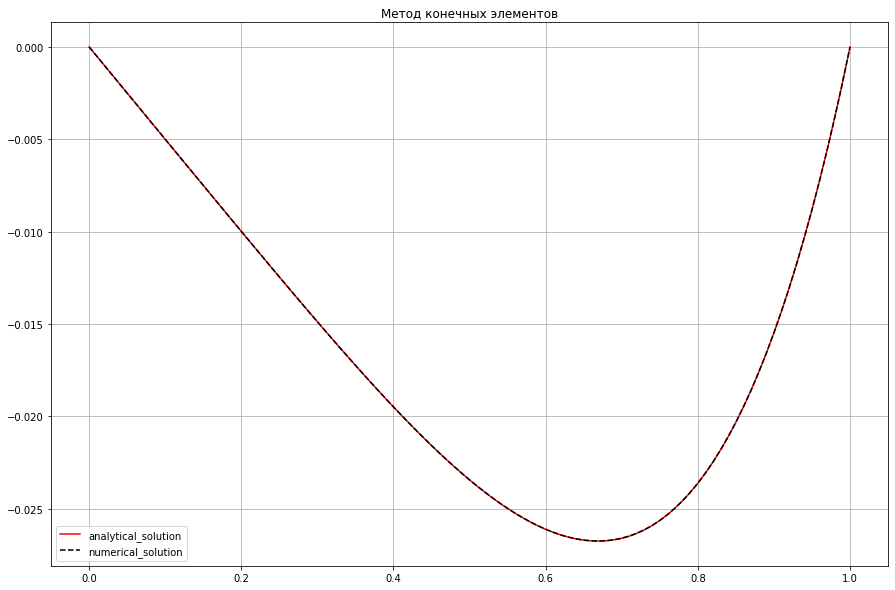

Максимальный модуль ошибки: 3.207400000107552e-06


In [9]:
plt.figure(figsize=(15,10))
plt.title('Метод конечных элементов')
plt.plot(x_array, analytical_solution, color='red', label='analytical_solution')
plt.plot(x_array, numerical_solution1, color='black', label='numerical_solution', ls='--')
plt.grid()
plt.legend()
plt.show()

print('Максимальный модуль ошибки, МКЭ', np.max(np.abs(numerical_solution1 - analytical_solution)))

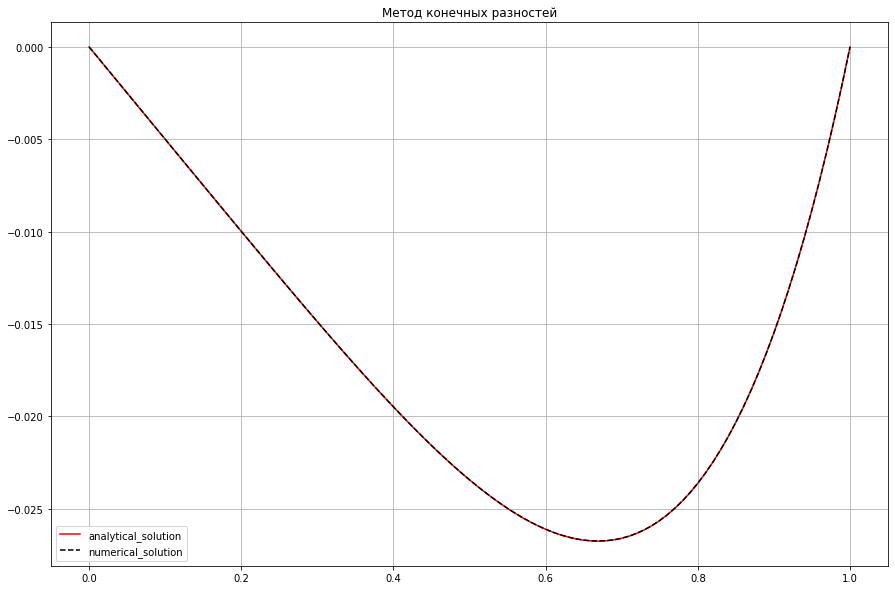

Максимальный модуль ошибки: 3.207400000031224e-06


In [10]:
plt.figure(figsize=(15,10))
plt.title('Метод конечных разностей')
plt.plot(x_array, analytical_solution, color='red', label='analytical_solution' )
plt.plot(x_array, u_difference, color='black', label='numerical_solution', ls='--')
plt.grid()
plt.legend()
plt.show()

print('Максимальный модуль ошибки, МКР', np.max(np.abs(u_difference - analytical_solution)))

In [14]:
xmin = 0
xmax = 1
hx = 0.01 / np.sqrt(2)
    

nx = int((xmax - xmin) / hx) +1
x_array, hx = np.linspace(xmin,xmax, nx, retstep = True)
nx = len(x_array)

u_element_ = finite_element_method()
u_difference_ = finite_difference_method()

basis__ = [value_v_k(k) for k in range (1, nx-1)]
basis__ = np.array(basis__)

def sum(x):
    data = 0
    for i in range(len(basis__)):
        data += u_element_[i] * basis__[i](x)
    return data

vectorize = np.vectorize(sum)
numerical_solution1_ = vectorize(x_array)
analytical_solution = solution(x_array)


print('Максимальный модуль ошибки, МКЭ:', np.max(np.abs(numerical_solution1_ - analytical_solution)))

print('Максимальный модуль ошибки, МКР', np.max(np.abs(u_difference_- analytical_solution)))

Максимальный модуль ошибки, МКЭ: 1.6132899722763605e-06
Максимальный модуль ошибки, МКР 1.61328997246718e-06
